In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read a comma-separated values (csv) file into DataFrame.

The data folder contains a file named "newark_tree_data.csv". Read this file into a dataframe.


resources:
* [Pandas read csv docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)

In [10]:
# Create DataFrame here.
df = pd.read_csv('data/newark_tree_data.csv')

In [11]:
# Display the first few rows of the DataFrame here.
df.head()

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
0,11.0,Elan Park,Elan Park,2,Blue Hen Rg,11.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,40,0-5%,0-5%
1,12.0,Elan Park,Elan Park,2,Blue Hen Rg,12.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,41,0-5%,0-5%
2,13.0,Elan Park,Elan Park,2,Blue Hen Rg,13.0,Front,False,"pine, eastern white",Pinus strobus,...,False,False,False,False,True,False,No,54,0-5%,6-10%
3,14.0,Elan Park,Elan Park,2,Blue Hen Rg,14.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,57,11-15%,26-30%
4,15.0,Elan Park,Elan Park,2,Blue Hen Rg,15.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,55,11-15%,21-25%


In [12]:
# How many columns does the DataFrame contain?
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4193 entries, 0 to 4192
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          4193 non-null   float64
 1   ON          4193 non-null   object 
 2   AREA        4169 non-null   object 
 3   ADDRESS     4193 non-null   int64  
 4   STREET      4193 non-null   object 
 5   SITE        4193 non-null   float64
 6   SIDE        4193 non-null   object 
 7   ASSIGNED    4193 non-null   bool   
 8   COMMON      4193 non-null   object 
 9   BOTANICAL   4193 non-null   object 
 10  CULTIVAR    113 non-null    object 
 11  DBH         4193 non-null   float64
 12  REMOVAL     434 non-null    object 
 13  STEMS       4193 non-null   float64
 14  COND        4087 non-null   object 
 15  MAINTPRIM   101 non-null    object 
 16  OBSERVE     4193 non-null   object 
 17  INSPECT     4193 non-null   bool   
 18  LOCATION    4193 non-null   object 
 19  NOTES       1114 non-null  

In [13]:
# What attributes (columns) does this DataFrame contain?
df.columns

Index(['ID', 'ON', 'AREA', 'ADDRESS', 'STREET', 'SITE', 'SIDE', 'ASSIGNED',
       'COMMON', 'BOTANICAL', 'CULTIVAR', 'DBH', 'REMOVAL', 'STEMS', 'COND',
       'MAINTPRIM', 'OBSERVE', 'INSPECT', 'LOCATION', 'NOTES', 'DATE', 'TIME',
       'STAFF', 'XCOORD', 'YCOORD', 'FAILURE', 'LIKELIHOOD', 'TARGET',
       'CONSEQ', 'RISK', 'UNIQUEID', 'EDITTIME', 'SPREAD', 'HEIGHT',
       'CLEARANCE', 'DECAYCL', 'DECAYT', 'DECAYRF', 'DAMC', 'DAMT', 'DAMRF',
       'CAVITYCL', 'CAVITYT', 'CAVITYRF', 'IMPROPMULC', 'IMPROPPRUN',
       'NUTRIENTD', 'PEST', 'GIRDLING', 'STRESS', 'OHUTILITY', 'TOP_HEIGHT',
       'CROWN_M', 'CROWN_DIE'],
      dtype='object')

Upon reviewing the columns of the DataFrame, we see that there is already a column named ID that is well suited for an index column.  

For the purposes of this lab, we are only going to need a few of the available attributes. The attributes we wish to keep are listed below:
* ID
* UNIQUEID
* COMMON
* BOTANICAL
* COND
* RISK
* HEIGHT

Let's provide the index_col and the usecols args when we invoke the read_csv method.

In [28]:
# Create the new DataFrame here.
new_df = pd.read_csv('data/newark_tree_data.csv', index_col = 0, usecols = ['ID', 'UNIQUEID', 'COMMON', 'BOTANICAL', 'COND', 'RISK', 'HEIGHT'])

In [35]:
treesAr = new_df[['UNIQUEID', 'COMMON', 'BOTANICAL', 'COND', 'RISK', 'HEIGHT']]

In [36]:
# Display the first few rows of the new DataFrame here.
treesAr.head()

,UNIQUEID,COMMON,BOTANICAL,COND,RISK,HEIGHT
ID,,,,,,
11.0,LM 20150929141218,"arborvitae, eastern",Thuja occidentalis,Good,Low,40
12.0,LM 20150929141418,"arborvitae, eastern",Thuja occidentalis,Very Good,Low,40
13.0,LM 20150929141844,"pine, eastern white",Pinus strobus,Good,Low,54
14.0,LM 20150929142424,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,56
15.0,LM 20150929143018,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,55


The data narritive specifies that 4,193 sites were inventoried. Use the DataFrame shape attribute to verify the number of rows.

In [41]:
# How many rows does your DataFrame contain.
treesAr.shape

(4193, 6)

Let's look at the distribution of data for the HEIGHT attribute.

In [42]:
# What is the min height?
treesAr.min()

UNIQUEID     LM 20150929131426
COMMON           Amur corktree
BOTANICAL       Abies balsamea
HEIGHT                       0
dtype: object

In [43]:
# What is the max height?
treesAr.max()

UNIQUEID     SR 20151104161140
COMMON       zelkova, Japanese
BOTANICAL    vacant site large
HEIGHT                     140
dtype: object

In [44]:
# How do we acquire count, mean, standard deviation, and distribution information from the DataFrame 
# by invoking a single method?
treesAr.describe()

,HEIGHT
count,4193.000000
mean,55.311472
std,36.293489
min,0.000000
25%,23.000000
50%,50.000000
75%,86.000000
max,140.000000


# Plot a histogram using the HEIGHT attribute. 

resources:
* [Magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
* [Pandas Series Hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist)

In [49]:
# Apply magic command to display matplotlib images inline
# some background, magic commands are command line programs to be run within the iPython system 
# They're also any command prefixed by the perecent symbol
%matplotlib inline

Text(0, 0.5, 'Height')

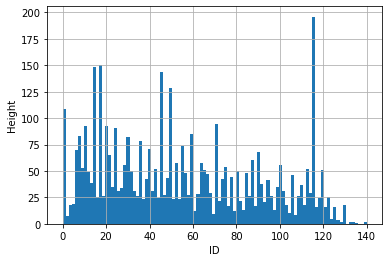

In [126]:
# Create a histogram using the HEIGHT attribute here
treesHist = treesAr.HEIGHT.hist(bins = 100)
treesHist.set_xlabel('ID')
treesHist.set_ylabel('Height')

The data narrative specifies the following:
"A total of 4,193 sites were inventoried, including 4,087 trees, 100 stumps, and 6 vacant planting sites"

Earlier, we were able to validate the total number of entries in the DataFrame. Let's now dig in a bit deeper and validate the stumps and vacant planting sites.

In [78]:
# How many entries are stumps
len(treesAr.query('HEIGHT == 0')) - len(treesAr[(treesAr.BOTANICAL.str.contains('vacant') == True)])

100

In [81]:
# How many entries are vacant sites
#.query, needs an engine assingment to 'python'

len(treesAr.query('BOTANICAL.str.contains("vacant")', engine = 'python'))

6

In [88]:
# Do these number add up?
True

True

# Plot a bar graph using the COND attribute.

resources:
* [Pandas Series Bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html#pandas.Series.plot.bar)

In [131]:
# How can we determine all of the possible values describing the condition of a tree and their associated counts?
countCond = treesAr.groupby('COND').UNIQUEID.count()
countCond
#type(countCond)

COND
Critical       74
Dead          218
Excellent     163
Fair         1598
Good         1168
Poor          402
Very Good     381
Very Poor      83
Name: UNIQUEID, dtype: int64

In [97]:
# Were these already in the order you would want them to be in order for a graph to make sense? 
# If not, reorder  the Series.
countCond.reindex(['Dead', 'Critical', 'Very Poor', 'Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

COND
Dead          218
Critical       74
Very Poor      83
Poor          402
Fair         1598
Good         1168
Very Good     381
Excellent     163
Name: COMMON, dtype: int64

<AxesSubplot:xlabel='COND'>

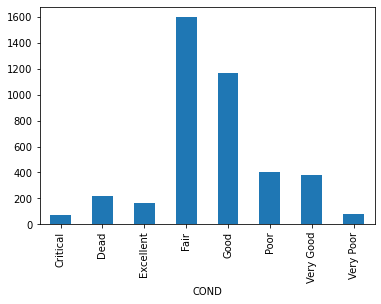

In [100]:
# Plot the Series here
countCond.plot.bar()

In [118]:
# How many entries have missing values for the COND attribute? Why are these values missing?
treesAr['COND'].isnull().sum() - len(treesAr[treesAr['COND'] == ' '])
# the values are missing because either they're stumps or vacant lots


# .sum() counts every true

106

# Plot a pie chart using the RISK attribute.

resources:
* [Pandas Series Pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html#pandas.Series.plot.pie)
* [matplotlib pie chart docs](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)

In [168]:
# How can we determine all of the possible values describing the RISK associated with each tree
# along with the corresponding row counts?
countRisk = treesAr[['UNIQUEID', 'RISK']].groupby('RISK').count()
countRisk.columns = ['COUNT']
countRisk

,COUNT
RISK,
High,13
Low,3833
Moderate,241


In [169]:
# Create an array containing the colors green, yellow, and orange
# When we create our pie chart, the colors should be associated with the attributes according to the specifications below:
# Green -> Low
# Yellow -> Moderate
# Orange -> High
colors = ['green', 'yellow', 'orange']
labels = ['low', 'moderate', 'high']

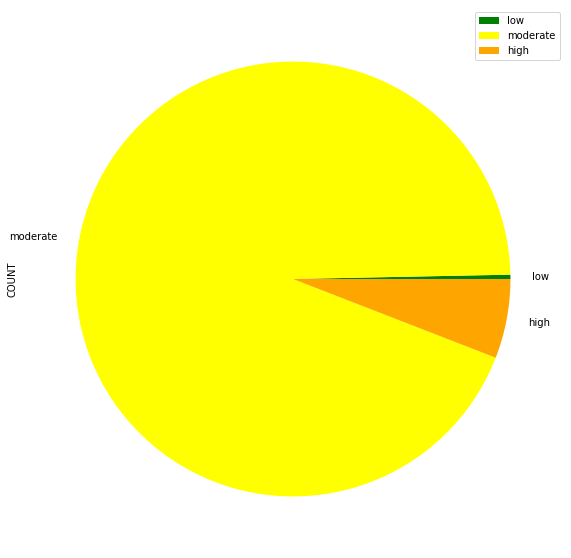

In [176]:
# Plot the pie chart here
colors = ['green', 'yellow', 'orange']

plot = countRisk.plot.pie(y = 'COUNT',colors = colors, labels = labels, figsize = (10, 10))

In [171]:
# How many entries have missing values for the RISK attribute? Why are these values missing?
treesAr.RISK.isnull().sum()

# once again, stumps or lots are not trees

106

# Indexing

In [146]:
# Display row by position 1

treesAr.iloc[[1]]

,UNIQUEID,COMMON,BOTANICAL,COND,RISK,HEIGHT
ID,,,,,,
12.0,LM 20150929141418,"arborvitae, eastern",Thuja occidentalis,Very Good,Low,40


In [ ]:
# Display row by label 1


In [141]:
treesAr.loc[1]

UNIQUEID        LM 20150929131426
COMMON              locust, black
BOTANICAL    Robinia pseudoacacia
COND                         Poor
RISK                     Moderate
HEIGHT                         43
Name: 1.0, dtype: object